<a href="https://colab.research.google.com/github/PoojaSwamii/Hotel-Booking---Data-Analysis/blob/main/Pooja_Swami_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing libraries
import numpy as np
import pandas as pd 

from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import folium
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/module/Hotel Bookings.csv')

In [4]:
hotel_df.shape

(119390, 32)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking null values
hotel_df.isnull().sum()

In [ ]:
#handling null values
hotel_df['children'].fillna(0,inplace=True)
hotel_df['country'].fillna(0,inplace=True)
hotel_df['country'].fillna(0,inplace= True)
hotel_df['agent'].fillna(0,inplace= True)
hotel_df['company'].fillna(0,inplace= True)


In [6]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.columns

In [7]:
#droping duplicates
hotel_df.drop_duplicates(inplace=True)

In [8]:
hotel_df.shape

(87396, 32)

In [10]:
#removing the value which contains zeroes 
hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children'] == 0].shape

In [11]:
hotel_df.drop(hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children'] == 0].index, inplace = True)

In [ ]:
#changing the format 
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
hotel_df['arrival_date_year'] = pd.to_datetime(hotel_df['arrival_date_year'], format = '%Y-%m-%d')

In [12]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

# 1. Total number of check-out and canceled status for particular hotel ?

In [ ]:

status_check= hotel_df.groupby('hotel')['reservation_status'].value_counts()
print(status_check)

Text(0.5, 0, 'Hotel & Status')

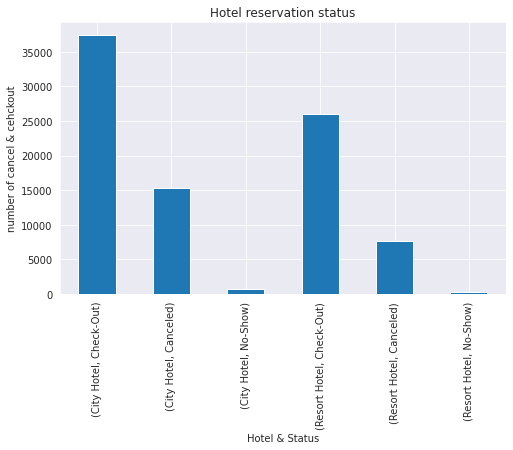

In [ ]:
status_check.plot(kind='bar')
plt.rcParams['figure.figsize'] = (8, 5)
plt.title('Hotel reservation status')
plt.ylabel('number of cancel & cehckout')
plt.xlabel('Hotel & Status')

# 2. Cancellation rate based on the hotel ?

In [ ]:
cancelled_data = hotel_df[hotel_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = hotel_df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

In [ ]:

#Representing the data in the graph format

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

# **4. Previous Cancellation status bases on hotels ?**

# **3. Which channel is mostly used for early booking of hotels?**

# 5. Which distribution channel brings better revenue generating deals for hotels?